In [1]:
import pandas as pd

df = pd.read_csv("coffee_shop_revenue.csv")

In [2]:
print(df.head())
print(df.info())
print(df.describe())

   Number_of_Customers_Per_Day  Average_Order_Value  Operating_Hours_Per_Day  \
0                          152                 6.74                       14   
1                          485                 4.50                       12   
2                          398                 9.09                        6   
3                          320                 8.48                       17   
4                          156                 7.44                       17   

   Number_of_Employees  Marketing_Spend_Per_Day  Location_Foot_Traffic  \
0                    4                   106.62                     97   
1                    8                    57.83                    744   
2                    6                    91.76                    636   
3                    4                   462.63                    770   
4                    2                   412.52                    232   

   Daily_Revenue  
0        1547.81  
1        2084.68  
2        3118.39 

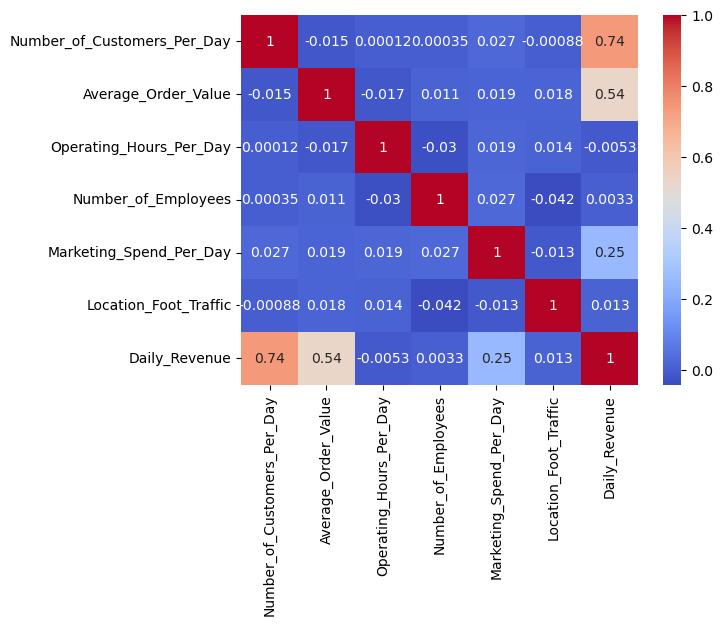

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [4]:
# Removes rows with missing values
df = df.dropna()

In [5]:
# Removing outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
# Define features (X) and target variable (y)
X = df.drop("Daily_Revenue", axis=1)  # Drop target column
y = df["Daily_Revenue"]  # Define target variable

In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
selector = RFE(model, n_features_to_select=3)  # Keep only top 3 features
X_selected = selector.fit_transform(X, y)

# Print selected features
selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Number_of_Customers_Per_Day', 'Average_Order_Value',
       'Number_of_Employees'],
      dtype='object')


In [16]:
#Spliting the data - Traning(80%) and Testing(20%)
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop("Daily_Revenue", axis=1)  # Drop target column from features
y = df["Daily_Revenue"]  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-test split completed successfully!")

Train-test split completed successfully!


In [17]:
# Scikit-learn to train linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Making predictions
y_pred = model.predict(X_test)

In [19]:
#calculating performance metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 95576.12656270296
R-squared: 0.9018695690592708
